 # Neural Network to Predict RawIntD

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

2023-01-04 09:55:32.055866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 0 Import the data

In [188]:
# Load the data
data = pd.read_csv('../data/Yi.data.longformat.20191121_censoring_handled.csv', sep=',',header=0)
#filter data with Date = 05/07/2019,  09/07/2019', 10/07/2019, 07/18/2019,'07/19/2019','07/22/2019'
data = data[data['Date'].isin(['05/07/2019', '09/07/2019', '10/07/2019', '07/18/2019','07/19/2019','07/22/2019'])]
#shuffle rows in data
#data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Date,GloveSizeGroup,GloveSize,RawIntD,LoadingWeight,ContactNumber,Surface,Gloves,Gender,ID,PowderArea
0,05/07/2019,Medium,M,5896309,47.329800,1,Plastic,Y,Male,1,29.513
1,05/07/2019,Medium,M,4510793,271.252321,1,Cloth,Y,Male,1,60.898
2,05/07/2019,Medium,M,2865536,161.794500,1,Glass,Y,Male,1,56.828
3,05/07/2019,Medium,NaN,9695240,104.174400,1,Plastic,N,Male,1,78.440
4,05/07/2019,Medium,NaN,10471291,149.071000,1,Cloth,N,Male,1,86.345


In [168]:
# print unique Date in data
print(data.Date.unique())

['05/07/2019' '09/07/2019' '10/07/2019' '07/18/2019' '07/19/2019'
 '07/22/2019' '07/23/2019' '07/24/2019' '07/25/2019' '07/26/2019']


## Find and Drop nans

In [189]:
# find Nan values
data.isnull().sum()

Date                0
GloveSizeGroup      0
GloveSize         870
RawIntD             0
LoadingWeight       6
ContactNumber       0
Surface             0
Gloves              0
Gender              0
ID                  0
PowderArea          0
dtype: int64

In [203]:
# Drop the columns that are not needed: Date, GloveSizeGroup,GloveSize,ID and Gender
df = data.drop(columns=["Date","GloveSize","ID"])
# drop the rows with Nan values
df.isnull().sum()
df = df.dropna()
# Select the features and target
X = df.drop(columns=["RawIntD"])
y = df["RawIntD"]

Run One-Hot encoding for Surface and Gloves

In [204]:
# One-hot encode the data using pandas get_dummies
X = pd.get_dummies(X)
X.head()

,LoadingWeight,ContactNumber,PowderArea,GloveSizeGroup_Large,GloveSizeGroup_Medium,GloveSizeGroup_Small,Surface_Cloth,Surface_Glass,Surface_Plastic,Gloves_N,Gloves_Y,Gender_Female,Gender_Male
0,47.329800,1,29.513,0,1,0,0,0,1,0,1,0,1
1,271.252321,1,60.898,0,1,0,1,0,0,0,1,0,1
2,161.794500,1,56.828,0,1,0,0,1,0,0,1,0,1
3,104.174400,1,78.440,0,1,0,0,0,1,1,0,0,1
4,149.071000,1,86.345,0,1,0,1,0,0,1,0,0,1


## Preprocess the data to scale

In [205]:
# Preprocess the data
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Preprocess the data
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

X_train['LoadingWeight'] = scaler.fit_transform(X_train['LoadingWeight'].values.reshape(-1, 1))
X_test['LoadingWeight'] = scaler.transform(X_test['LoadingWeight'].values.reshape(-1, 1))

X_train['PowderArea'] = scaler.fit_transform(X_train['PowderArea'].values.reshape(-1, 1))
X_test['PowderArea'] = scaler.transform(X_test['PowderArea'].values.reshape(-1, 1))


y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))



## 2.0 Create the Neural Network

In [207]:
# Define the model - deep neural net

model = Sequential()
model.add(Dense(5, input_dim=X.shape[1], activation="relu"))
model.add(Dense(5, activation="tanh"))
model.add(Dense(1,kernel_initializer='normal'))

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mean_squared_error'])

# Fit the model to the training data
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=50, batch_size=15)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, batch_size=15)
print("Test MSE:", score)

Epoch 1/50
81/81 [==============================] - 2s 6ms/step - loss: 0.9625 - mean_squared_error: 0.9625 - val_loss: 0.9584 - val_mean_squared_error: 0.9584
Epoch 2/50
81/81 [==============================] - 0s 4ms/step - loss: 0.8121 - mean_squared_error: 0.8121 - val_loss: 0.7675 - val_mean_squared_error: 0.7675
Epoch 3/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5960 - mean_squared_error: 0.5960 - val_loss: 0.5263 - val_mean_squared_error: 0.5263
Epoch 4/50
81/81 [==============================] - 0s 3ms/step - loss: 0.3845 - mean_squared_error: 0.3845 - val_loss: 0.3656 - val_mean_squared_error: 0.3656
Epoch 5/50
81/81 [==============================] - 0s 3ms/step - loss: 0.2778 - mean_squared_error: 0.2778 - val_loss: 0.3002 - val_mean_squared_error: 0.3002
Epoch 6/50
81/81 [==============================] - 0s 3ms/step - loss: 0.2380 - mean_squared_error: 0.2380 - val_loss: 0.2696 - val_mean_squared_error: 0.2696
Epoch 7/50
81/81 [======================

In [209]:
# Save the model
model.save("model.h5")

# Fine tune the hyperparameters

In [197]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

17/17 [==============================] - 0s 3ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 150.1670972305355


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 1ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 108.53623407364988


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 3ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 146.48285984538944


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 1ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 87.22199510581628


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 1ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 119.94632753345078


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 110.88088005615401


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 1ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 136.58410263129355


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 3ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 155.7178638016487


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 1ms/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 143.44358170851652


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 2ms/step
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 108.9076866992373


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 2ms/step
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 127.72794582972536


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 2ms/step
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 110.89175531193392


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 2ms/step
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 146.72348688675407


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 977us/step
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 138.99734499547066


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 1ms/step
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 137.7304040250433


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


17/17 [==============================] - 0s 2ms/step
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 100.3202858139283


/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/1449919749.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


### Plot the hyperparameter results

<AxesSubplot:xlabel='Parameters'>

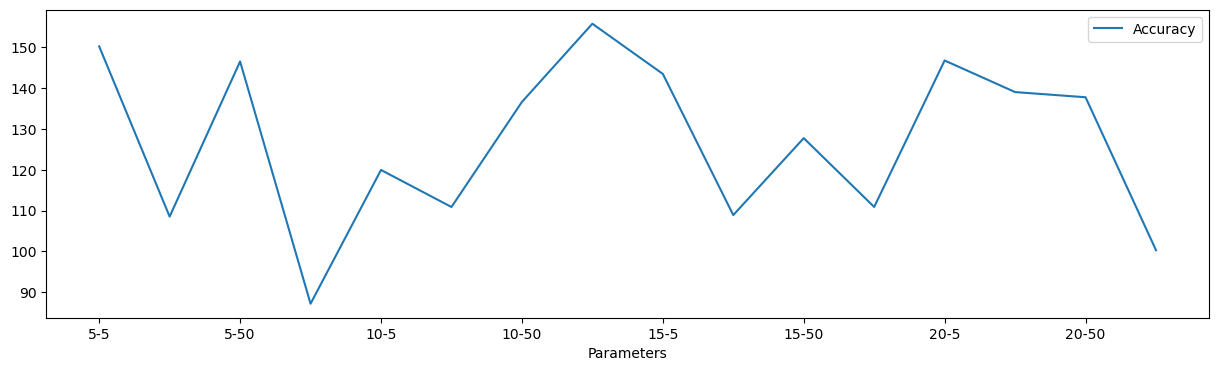

In [198]:
# Plotting the results
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

## Predict and Plot the results

17/17 [==============================] - 0s 3ms/step


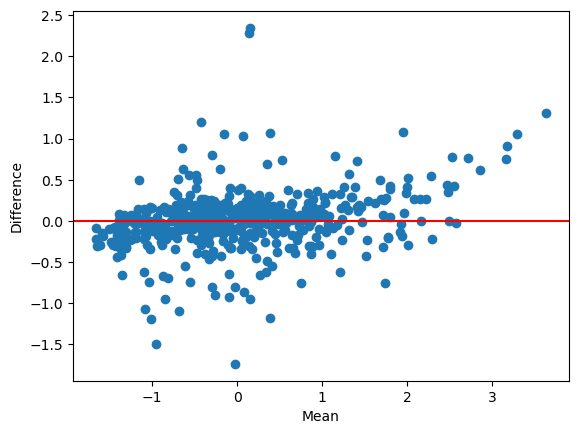

In [208]:
# Use the model to predict the test data
y_pred = model.predict(X_test)

# Plot a Bland Altman plot
# Calculate the mean and difference
mean = (y_test + y_pred) / 2
diff = y_test - y_pred

# Plot the Bland Altman plot
plt.scatter(mean, diff)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Mean")
plt.ylabel("Difference")
plt.show()


## Plot the loss per epoch

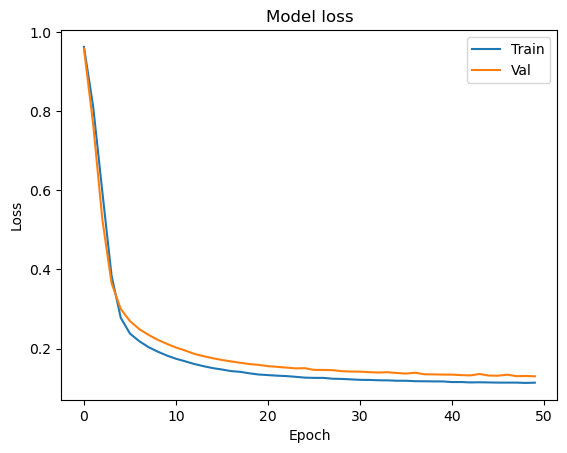

In [210]:
import matplotlib.pyplot as plt

# Get the loss values from the history object
loss = history.history['loss']

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()



In [202]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model
 
###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
 
# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }
 
# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)
 
###########################################
from sklearn.metrics import make_scorer
 
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
 
#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)
 
#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()
 
# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)
 
EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')
 
print('### Printing Best parameters ###')
grid_search.best_params_

/var/folders/vr/xt0ndkq104bbx6cjc725p1cc0000gn/T/ipykernel_46294/3650139869.py:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  RegModel=KerasRegressor(make_regression_ann, verbose=0)


Epoch 1/10
139/139 [==============================] - 1s 2ms/step - loss: 33525417902080.0000
Epoch 2/10
139/139 [==============================] - 0s 2ms/step - loss: 33525203992576.0000
Epoch 3/10
139/139 [==============================] - 0s 2ms/step - loss: 33524356743168.0000
Epoch 4/10
139/139 [==============================] - 0s 2ms/step - loss: 33522406391808.0000
Epoch 5/10
139/139 [==============================] - 0s 2ms/step - loss: 33518918828032.0000
Epoch 6/10
139/139 [==============================] - 0s 2ms/step - loss: 33513642393600.0000
Epoch 7/10
139/139 [==============================] - 0s 3ms/step - loss: 33506235252736.0000
Epoch 8/10
139/139 [==============================] - 0s 2ms/step - loss: 33496489787392.0000
Epoch 9/10
139/139 [==============================] - 0s 3ms/step - loss: 33484169019392.0000
Epoch 10/10
139/139 [==============================] - 0s 2ms/step - loss: 33469021290496.0000
###########################################################

{'Optimizer_trial': 'adam', 'batch_size': 10, 'epochs': 20}